# Phase 1: Descriptive Statistics

**Swiss Ballot Chatbot Study - Measurement Analysis**

2×2 Factorial Design: Transparency (T0/T1) × Control (C0/C1)

| Condition | Transparency | Control |
|-----------|--------------|--------|
| A | T0 (Low) | C0 (Low) |
| B | T1 (High) | C0 (Low) |
| C | T0 (Low) | C1 (High) |
| D | T1 (High) | C1 (High) |

---

## Setup & Configuration

In [1]:
# Import required libraries
import os
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# Figure size defaults
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Import functions from phase1_descriptive_statistics.py
from phase1_descriptive_statistics import (
    AnalysisConfig,
    get_db_connection,
    load_participant_data,
    prepare_variables,
    clean_language_codes,
    compute_sample_flow,
    compute_n_per_condition,
    compute_donation_rates,
    compute_demographics,
    compute_manipulation_checks,
    compute_risk_trust,
    compute_dashboard_frequencies,
    compute_q14_response_rate,
    wilson_ci
)

print("Analysis functions imported successfully!")

Analysis functions imported successfully!


In [3]:
# ============================================================
# CONFIGURATION: Select participant type
# ============================================================
# Set to True for AI participants, False for human participants
IS_AI_PARTICIPANT = False  # CHANGED: Now analyzing human participants

# Initialize configuration
config = AnalysisConfig(is_ai_participant=IS_AI_PARTICIPANT)

participant_label = "AI Test Users" if IS_AI_PARTICIPANT else "Human Participants"
print(f"Analyzing: {participant_label}")

Analyzing: Human Participants


## Data Loading & Preparation

In [4]:
# Load raw data from database
df_raw = load_participant_data(config)

print(f"\nRaw data shape: {df_raw.shape}")
print(f"Columns: {list(df_raw.columns)}")

[INFO] Loaded 291 human participants from database

Raw data shape: (291, 25)
Columns: ['participant_id', 'session_id', 'condition', 'language', 'current_phase', 'is_ai_participant', 'donation_decision', 'donation_config', 'created_at', 'completed_at', 'decision_at', 'transparency1', 'transparency2', 'control1', 'control2', 'risk_traceability', 'risk_misuse', 'trust1', 'attention_check', 'age', 'gender', 'primary_language', 'education', 'eligible_to_vote_ch', 'open_feedback']


In [5]:
# Prepare derived variables
df = prepare_variables(df_raw, config)

# Display first few rows
df.head()

[INFO] Language codes cleaned: ['de-DE', 'de', 'en-GB', 'en-US', 'en', 'en-CH', 'de-CH', 'fr', 'fr-CH', 'fr-FR', 'en-AU', 'es-ES', 'it', 'gsw'] → ['de', 'en', 'fr', 'other', 'it']
[INFO] Applied language code cleaning for human participants
[INFO] Created derived variables: transparency_level, control_level, T_x_C, mc_transparency, mc_control, out_risk, attention_check_correct, attention_check_missing, attention_check_failed, dashboard fields


,participant_id,session_id,condition,language,current_phase,is_ai_participant,donation_decision,donation_config,created_at,completed_at,decision_at,transparency1,transparency2,control1,control2,risk_traceability,risk_misuse,trust1,attention_check,age,gender,primary_language,education,eligible_to_vote_ch,open_feedback,language_original,transparency_level,control_level,T_x_C,mc_transparency,mc_control,out_risk,attention_check_missing,attention_check_correct,attention_check_failed,dashboard_parsed,dashboard_scope,dashboard_purpose,dashboard_storage,dashboard_retention
0,3b22e0d3-a221-49b0-98e8-ea8ba3b3b1d6,6ca44df9-ed57-41e0-a781-48d8cf653907,B,de,complete,False,1.0,None,2026-01-05 15:31:40.844124,2026-01-05 15:58:07.970159,2026-01-05 15:56:34.828644,6.0,6.0,6.0,6.0,2.0,2.0,2.0,voting,35-44,female,de,applied-sciences,not-eligible,,de-DE,1,0,0,6.0,6.0,2.0,False,1,False,{},None,None,None,None
1,e9499730-5a02-4d70-adf5-c9380f7c546f,60f54ad5-358f-418d-a77b-7a8a4ef3ec90,C,de,complete,False,1.0,"{'scope': 'topics-only', 'purpose': 'academic', 'storage': 'swiss', 'retention': 'until-fulfilled'}",2026-01-05 15:32:06.153266,2026-01-05 15:37:34.813339,2026-01-05 15:36:11.603882,5.0,5.0,5.0,4.0,5.0,5.0,2.0,voting,45-54,prefer-not-say,de,university,not-eligible,,de-DE,0,1,0,5.0,4.5,5.0,False,1,False,"{'scope': 'topics-only', 'purpose': 'academic', 'storage': 'swiss', 'retention': 'until-fulfilled'}",topics-only,academic,swiss,until-fulfilled
2,c11a3d0b-9183-4294-a084-0bff3fd03c92,5343ed38-58fe-45b0-b56e-f5af67e50918,D,de,complete,False,1.0,"{'scope': 'questions-only', 'purpose': 'academic', 'storage': 'no-preference', 'retention': 'indefinite'}",2026-01-05 15:45:45.638659,2026-01-05 16:12:54.421182,2026-01-05 15:50:09.794247,6.0,4.0,6.0,5.0,1.0,4.0,6.0,voting,45-54,male,de,university,eligible,Unterstütze die Informationsbeschaffung zu Abstimmungen,de-DE,1,1,1,5.0,5.5,2.5,False,1,False,"{'scope': 'questions-only', 'purpose': 'academic', 'storage': 'no-preference', 'retention': 'indefinite'}",questions-only,academic,no-preference,indefinite
3,0509e0a0-0df0-4a6d-b00c-221de8771ff6,d2ee113b-8b13-416c-ad2c-254596d836cb,A,de,complete,False,1.0,None,2026-01-05 16:07:15.015887,2026-01-05 16:10:52.492577,2026-01-05 16:10:00.460491,2.0,1.0,1.0,1.0,2.0,2.0,4.0,voting,35-44,female,de,university,not-eligible,,de,0,0,0,1.5,1.0,2.0,False,1,False,{},None,None,None,None
4,cec39c76-3dda-45ea-b602-8701888cbde7,3a47a3e8-5ac2-4044-ac17-7faffcaed71b,D,de,complete,False,1.0,"{'scope': 'full', 'purpose': 'academic', 'storage': 'no-preference', 'retention': 'until-fulfilled'}",2026-01-05 16:24:56.681944,2026-01-05 16:33:50.580588,2026-01-05 16:31:49.329481,2.0,3.0,6.0,6.0,1.0,2.0,4.0,voting,45-54,male,de,university,eligible,,de,1,1,1,2.5,6.0,1.5,False,1,False,"{'scope': 'full', 'purpose': 'academic', 'storage': 'no-preference', 'retention': 'until-fulfilled'}",full,academic,no-preference,until-fulfilled


---
## 1.1 Sample Flow & Exclusions

**Exclusion criteria:**
1. Failed attention check (attention_check_correct = 0)
2. Missing condition
3. Missing donation_decision

In [6]:
# Compute sample flow
sample_flow = compute_sample_flow(df)
df_filtered = sample_flow['df_filtered']

print(f"\nFinal sample size for analysis: N = {len(df_filtered)}")


PHASE 1.1: SAMPLE FLOW & EXCLUSIONS
Initial N:                           291
Excluded (incomplete survey):         79
Excluded (failed attention):           7
Excluded (missing condition):          0
Excluded (missing donation):           0
------------------------------------------------------------
Final N for analysis:                205

Final sample size for analysis: N = 205


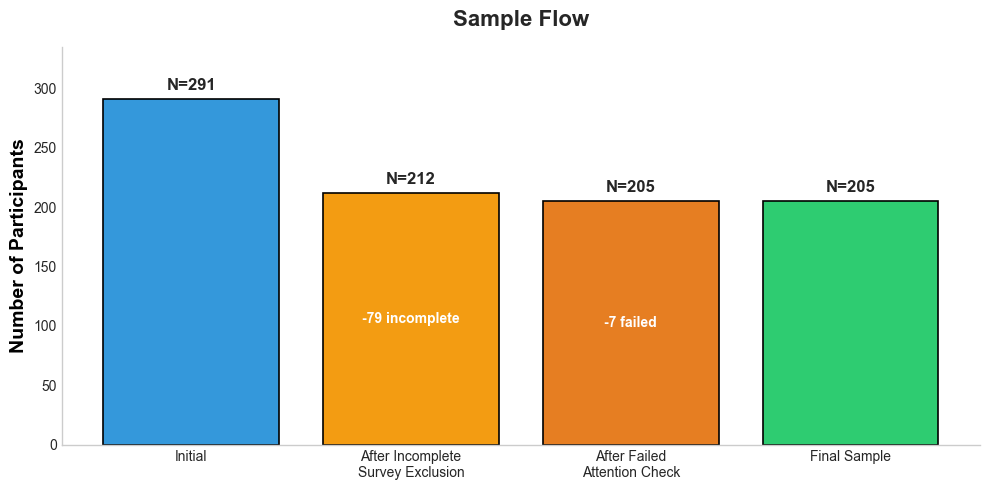

In [7]:
# Visualize sample flow
fig, ax = plt.subplots(figsize=(10, 5))

# Clean style
ax.grid(False)
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

stages = ['Initial', 'After Incomplete\nSurvey Exclusion', 'After Failed\nAttention Check', 'Final Sample']
n_values = [
    sample_flow['initial_n'],
    sample_flow['initial_n'] - sample_flow['excluded_incomplete_survey'],
    sample_flow['initial_n'] - sample_flow['excluded_incomplete_survey'] - sample_flow['excluded_failed_attention'],
    sample_flow['final_n']
]

colors = ['#3498db', '#f39c12', '#e67e22', '#2ecc71']
bars = ax.bar(stages, n_values, color=colors, edgecolor='black', linewidth=1.2)

for bar, val in zip(bars, n_values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
            f'N={val}', ha='center', va='bottom', fontsize=12, fontweight='bold')

exclusions = [
    '',
    f'-{sample_flow["excluded_incomplete_survey"]} incomplete',
    f'-{sample_flow["excluded_failed_attention"]} failed',
    ''
]
for i, (bar, excl) in enumerate(zip(bars, exclusions)):
    if excl:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 0.5, 
                excl, ha='center', va='center', fontsize=10, color='white', fontweight='bold')

ax.set_ylabel('Number of Participants', fontsize=14, color='black', fontweight='bold')
ax.set_title('Sample Flow', fontsize=16, fontweight='bold', pad=15)
ax.set_ylim(0, max(n_values) * 1.15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('output/phase1/fig_sample_flow.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 1.2 N per Condition (A/B/C/D)

In [8]:
# Compute N per condition
n_per_condition = compute_n_per_condition(df_filtered)
n_per_condition


PHASE 1.2: N PER CONDITION
Condition   n     %
        A  50  24.4
        B  53  25.9
        C  45  22.0
        D  57  27.8
    Total 205 100.0


,Condition,n,%
0,A,50,24.4
1,B,53,25.9
2,C,45,22.0
3,D,57,27.8
4,Total,205,100.0


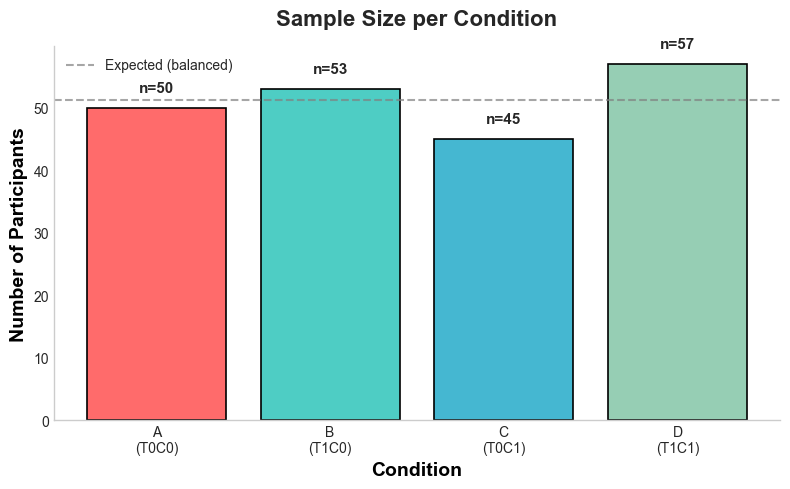

In [9]:
# Visualize N per condition
fig, ax = plt.subplots(figsize=(8, 5))

# Clean style
ax.grid(False)
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

conditions = ['A\n(T0C0)', 'B\n(T1C0)', 'C\n(T0C1)', 'D\n(T1C1)']
n_values = n_per_condition[n_per_condition['Condition'] != 'Total']['n'].values

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = ax.bar(conditions, n_values, color=colors, edgecolor='black', linewidth=1.2)

for bar, val in zip(bars, n_values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
            f'n={val}', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylabel('Number of Participants', fontsize=14, color='black', fontweight='bold')
ax.set_xlabel('Condition', fontsize=14, color='black', fontweight='bold')
ax.set_title('Sample Size per Condition', fontsize=16, fontweight='bold', pad=15)
ax.axhline(y=len(df_filtered)/4, color='gray', linestyle='--', alpha=0.7, label='Expected (balanced)')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('output/phase1/fig_n_per_condition.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 1.3 Donation Rate per Condition + 95% CI (Wilson)

**Note for AI test data:** Donation rates are simulated and should not be used for substantive interpretation. These results validate the data pipeline and analysis code, but human participants may exhibit different behavioral patterns.

In [10]:
# Compute donation rates
donation_rates = compute_donation_rates(df_filtered)
donation_rates


PHASE 1.3: DONATION RATE PER CONDITION + 95% CI
Condition   n  Donations  Rate (%)       95% CI
        A  50         45      90.0 [78.6, 95.7]
        B  53         48      90.6 [79.7, 95.9]
        C  45         42      93.3 [82.1, 97.7]
        D  57         53      93.0 [83.3, 97.2]
  Overall 205        188      91.7 [87.1, 94.8]


,Condition,n,Donations,Rate (%),95% CI Lower,95% CI Upper,95% CI
0,A,50,45,90.0,78.6,95.7,"[78.6, 95.7]"
1,B,53,48,90.6,79.7,95.9,"[79.7, 95.9]"
2,C,45,42,93.3,82.1,97.7,"[82.1, 97.7]"
3,D,57,53,93.0,83.3,97.2,"[83.3, 97.2]"
4,Overall,205,188,91.7,87.1,94.8,"[87.1, 94.8]"


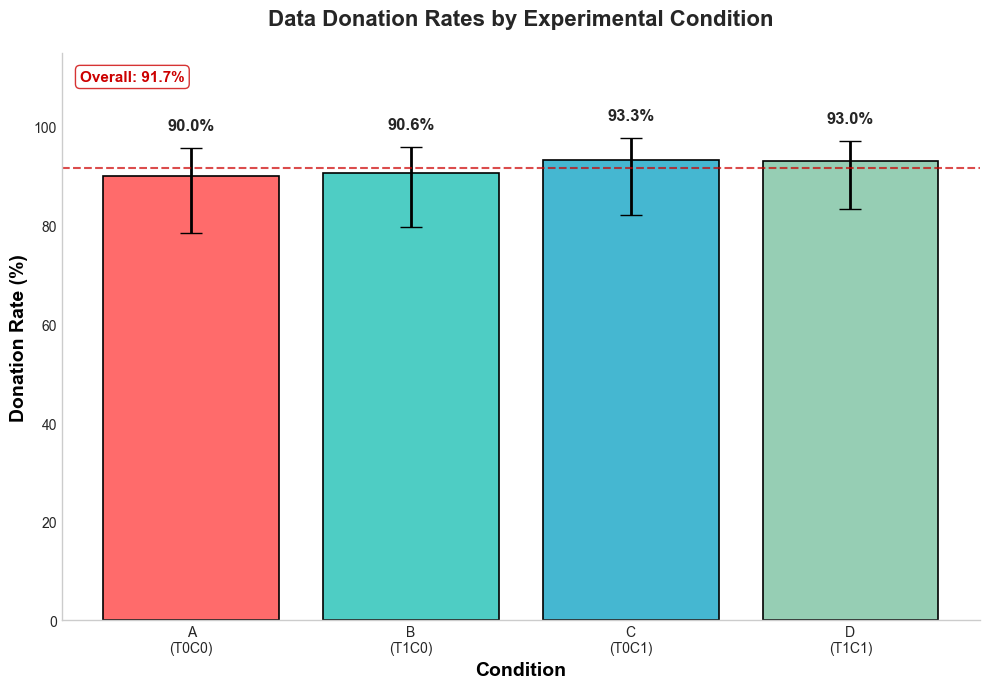

In [11]:
# Visualize donation rates with 95% CI
fig, ax = plt.subplots(figsize=(10, 7))

# Clean style: no grid
ax.grid(False)
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Filter to conditions only (exclude Overall)
dr_conditions = donation_rates[donation_rates['Condition'] != 'Overall'].copy()

conditions = ['A\n(T0C0)', 'B\n(T1C0)', 'C\n(T0C1)', 'D\n(T1C1)']
rates = dr_conditions['Rate (%)'].values
ci_lower = dr_conditions['95% CI Lower'].values
ci_upper = dr_conditions['95% CI Upper'].values

# Calculate error bars
errors = [rates - ci_lower, ci_upper - rates]

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = ax.bar(conditions, rates, color=colors, edgecolor='black', linewidth=1.2, 
              yerr=errors, capsize=8, error_kw={'linewidth': 2})

# Add value labels above CI whiskers
for bar, rate, lower, upper in zip(bars, rates, ci_lower, ci_upper):
    ax.text(bar.get_x() + bar.get_width()/2, upper + 3, 
            f'{rate:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add overall rate line with label inside plot (top-left)
overall_rate = donation_rates[donation_rates['Condition'] == 'Overall']['Rate (%)'].values[0]
ax.axhline(y=overall_rate, color='#CC0000', linestyle='--', linewidth=1.5, alpha=0.7)
ax.text(0.02, 0.97, f'Overall: {overall_rate:.1f}%', transform=ax.transAxes,
        fontsize=11, color='#CC0000', fontweight='bold', va='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#CC0000', alpha=0.8))

ax.set_ylabel('Donation Rate (%)', fontsize=14, color='black', fontweight='bold')
ax.set_xlabel('Condition', fontsize=14, color='black', fontweight='bold')
ax.set_title('Data Donation Rates by Experimental Condition', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylim(0, 115)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('output/phase1/fig_donation_rates.png', dpi=150, bbox_inches='tight')
plt.show()

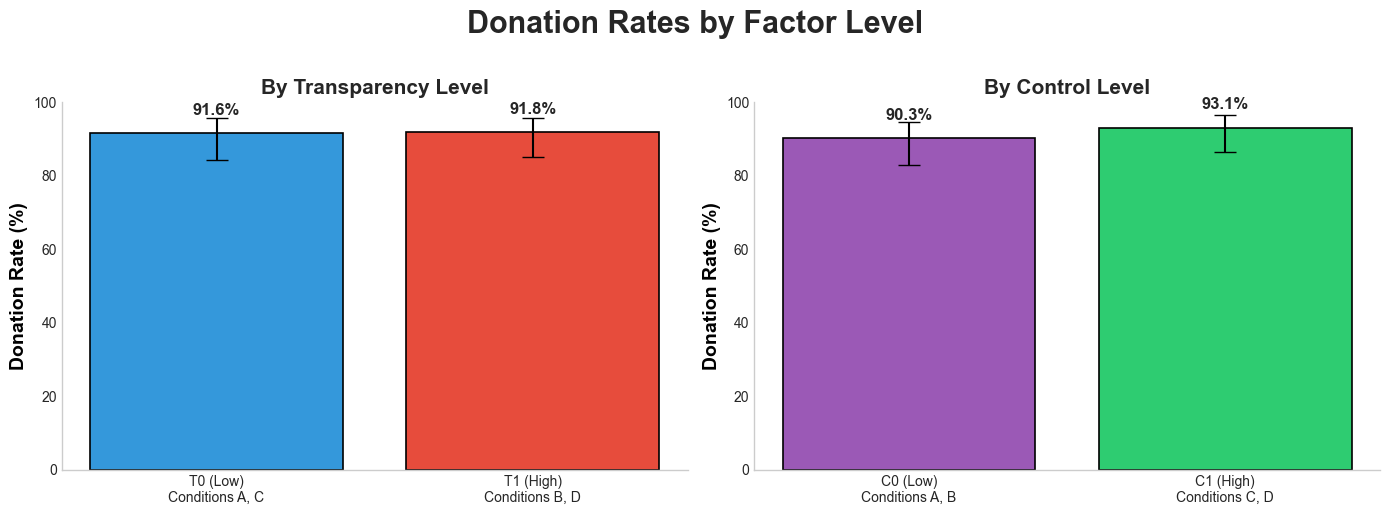

In [12]:
# Donation rate by Transparency Level (T0 vs T1)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Clean style for both subplots
for a in axes:
    a.grid(False)
    a.set_facecolor('white')
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
fig.patch.set_facecolor('white')

# By Transparency
t0_rate = df_filtered[df_filtered['transparency_level'] == 0]['donation_decision'].mean() * 100
t1_rate = df_filtered[df_filtered['transparency_level'] == 1]['donation_decision'].mean() * 100
t0_n = len(df_filtered[df_filtered['transparency_level'] == 0])
t1_n = len(df_filtered[df_filtered['transparency_level'] == 1])
t0_ci = wilson_ci(int(df_filtered[df_filtered['transparency_level'] == 0]['donation_decision'].sum()), t0_n)
t1_ci = wilson_ci(int(df_filtered[df_filtered['transparency_level'] == 1]['donation_decision'].sum()), t1_n)

bars = axes[0].bar(['T0 (Low)\nConditions A, C', 'T1 (High)\nConditions B, D'], 
                   [t0_rate, t1_rate], 
                   color=['#3498db', '#e74c3c'], 
                   edgecolor='black', linewidth=1.2,
                   yerr=[[t0_rate - t0_ci[0]*100, t1_rate - t1_ci[0]*100],
                         [t0_ci[1]*100 - t0_rate, t1_ci[1]*100 - t1_rate]],
                   capsize=8)
axes[0].set_ylabel('Donation Rate (%)', fontsize=14, color='black', fontweight='bold')
axes[0].set_title('By Transparency Level', fontsize=15, fontweight='bold')
axes[0].set_ylim(0, 100)
for bar, rate in zip(bars, [t0_rate, t1_rate]):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                 f'{rate:.1f}%', ha='center', fontsize=12, fontweight='bold')

# By Control
c0_rate = df_filtered[df_filtered['control_level'] == 0]['donation_decision'].mean() * 100
c1_rate = df_filtered[df_filtered['control_level'] == 1]['donation_decision'].mean() * 100
c0_n = len(df_filtered[df_filtered['control_level'] == 0])
c1_n = len(df_filtered[df_filtered['control_level'] == 1])
c0_ci = wilson_ci(int(df_filtered[df_filtered['control_level'] == 0]['donation_decision'].sum()), c0_n)
c1_ci = wilson_ci(int(df_filtered[df_filtered['control_level'] == 1]['donation_decision'].sum()), c1_n)

bars = axes[1].bar(['C0 (Low)\nConditions A, B', 'C1 (High)\nConditions C, D'], 
                   [c0_rate, c1_rate], 
                   color=['#9b59b6', '#2ecc71'], 
                   edgecolor='black', linewidth=1.2,
                   yerr=[[c0_rate - c0_ci[0]*100, c1_rate - c1_ci[0]*100],
                         [c0_ci[1]*100 - c0_rate, c1_ci[1]*100 - c1_rate]],
                   capsize=8)
axes[1].set_ylabel('Donation Rate (%)', fontsize=14, color='black', fontweight='bold')
axes[1].set_title('By Control Level', fontsize=15, fontweight='bold')
axes[1].set_ylim(0, 100)
for bar, rate in zip(bars, [c0_rate, c1_rate]):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                 f'{rate:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.suptitle('Donation Rates by Factor Level', fontsize=22, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('output/phase1/fig_donation_rates_by_factor.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 1.4 Demographics

In [13]:
# Compute demographics
demographics = compute_demographics(df_filtered, by_condition=False)


PHASE 1.4: DEMOGRAPHICS (OVERALL)

AGE:
Category  n    %
   35-44 78 38.0
   45-54 44 21.5
   25-34 43 21.0
   55-64 19  9.3
   18-24 12  5.9
     65+  9  4.4

GENDER:
      Category   n    %
        female 108 52.7
          male  92 44.9
prefer-not-say   3  1.5
    non-binary   2  1.0

PRIMARY LANGUAGE:
Category   n    %
      de 166 81.0
      fr  18  8.8
      en  10  4.9
   other   7  3.4
      it   4  2.0

EDUCATION:
         Category   n    %
       university 100 48.8
       vocational  36 17.6
 applied-sciences  34 16.6
higher-vocational  21 10.2
           matura  11  5.4
   prefer-not-say   2  1.0
        mandatory   1  0.5

ELIGIBLE TO VOTE CH:
    Category   n    %
    eligible 165 80.5
not-eligible  38 18.5
    not-sure   2  1.0


/var/folders/m2/wwp0kh353wlcxjqhp1nyx4xm0000gn/T/ipykernel_21201/2718916020.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


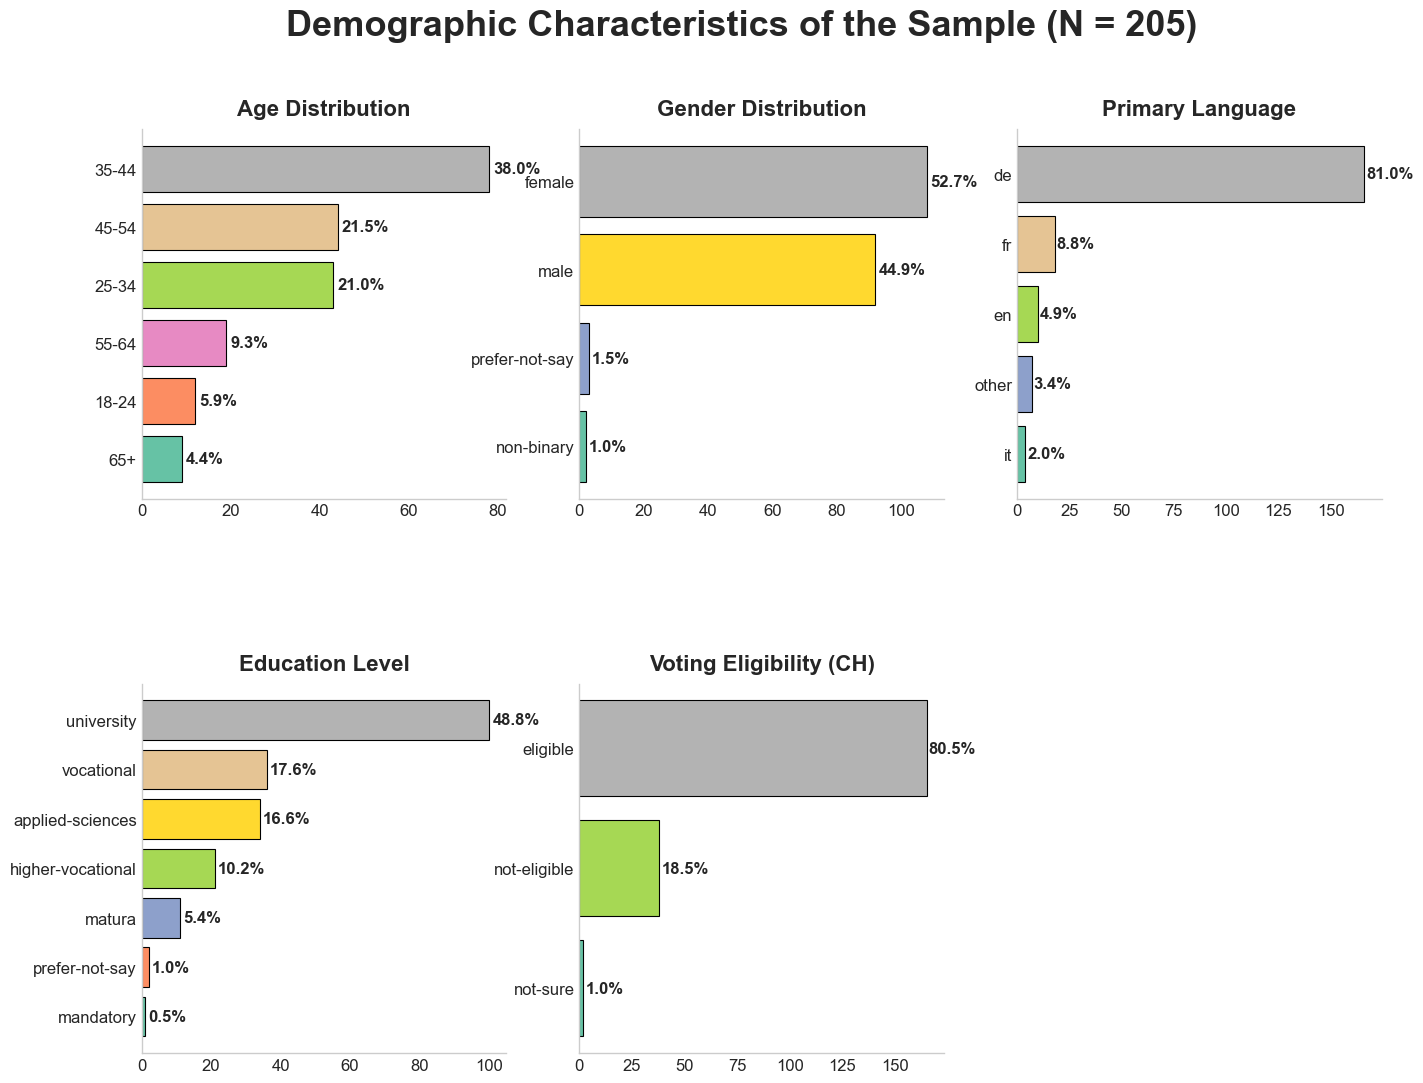

In [14]:
# Visualize demographics
fig, axes = plt.subplots(2, 3, figsize=(16, 12), gridspec_kw={'hspace': 0.5})
fig.patch.set_facecolor('white')

demo_vars = [
    ('age', 'Age Distribution'),
    ('gender', 'Gender Distribution'),
    ('primary_language', 'Primary Language'),
    ('education', 'Education Level'),
    ('eligible_to_vote_ch', 'Voting Eligibility (CH)')
]

for idx, (var, title) in enumerate(demo_vars):
    ax = axes[idx // 3, idx % 3]
    ax.grid(False)
    ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    key = f'{var}_overall'
    if key in demographics:
        data = demographics[key]
        data_sorted = data.sort_values('n', ascending=True)
        
        bars = ax.barh(data_sorted['Category'].astype(str), data_sorted['n'], 
                       color=plt.cm.Set2(np.linspace(0, 1, len(data_sorted))),
                       edgecolor='black', linewidth=0.8)
        ax.set_title(title, fontsize=16, fontweight='bold', pad=10)
        ax.tick_params(axis='both', labelsize=12)
        
        for bar, pct in zip(bars, data_sorted['%'].values):
            ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                    f'{pct:.1f}%', va='center', fontsize=12, fontweight='bold')

axes[1, 2].axis('off')

plt.suptitle('Demographic Characteristics of the Sample (N = 205)', 
             fontsize=26, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('output/phase1/fig_demographics.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 1.5 Manipulation Checks (MC-T, MC-C)

**Purpose:** Verify that experimental conditions created intended differences in perceived transparency and control.

**Note for AI test data:** These results validate *technical implementation* only (conditions are correctly assigned, UI displays properly). AI participants do not psychologically "perceive" transparency/control - they simulate responses. **Human participant data is required to validate that manipulations create the intended psychological states.**

In [15]:
# Compute manipulation checks
manipulation_checks = compute_manipulation_checks(df_filtered)


PHASE 1.5: MANIPULATION CHECKS

MC-T (PERCEIVED TRANSPARENCY) BY CONDITION:
           Mean    SD   n
condition                
A          4.46  1.39  50
B          4.74  1.25  53
C          4.90  1.01  45
D          4.92  0.92  57

MC-T BY TRANSPARENCY LEVEL (T0 vs T1):
           Mean    SD    n
T0 (Low)   4.67  1.24   95
T1 (High)  4.83  1.09  110

MC-C (PERCEIVED CONTROL) BY CONDITION:
           Mean    SD   n
condition                
A          4.39  1.39  50
B          4.32  1.30  53
C          4.82  0.91  45
D          4.86  0.98  57

MC-C BY CONTROL LEVEL (C0 vs C1):
           Mean    SD    n
C0 (Low)   4.35  1.34  103
C1 (High)  4.84  0.95  102


In [16]:
# Display manipulation check tables
print("\nMC-T (Perceived Transparency) by Condition:")
display(manipulation_checks['mc_t_by_condition'])

print("\nMC-T by Transparency Level (T0 vs T1):")
display(manipulation_checks['mc_t_by_t_level'])

print("\nMC-C (Perceived Control) by Condition:")
display(manipulation_checks['mc_c_by_condition'])

print("\nMC-C by Control Level (C0 vs C1):")
display(manipulation_checks['mc_c_by_c_level'])


MC-T (Perceived Transparency) by Condition:


,Mean,SD,n
condition,,,
A,4.46,1.39,50
B,4.74,1.25,53
C,4.90,1.01,45
D,4.92,0.92,57



MC-T by Transparency Level (T0 vs T1):


,Mean,SD,n
T0 (Low),4.67,1.24,95
T1 (High),4.83,1.09,110



MC-C (Perceived Control) by Condition:


,Mean,SD,n
condition,,,
A,4.39,1.39,50
B,4.32,1.30,53
C,4.82,0.91,45
D,4.86,0.98,57



MC-C by Control Level (C0 vs C1):


,Mean,SD,n
C0 (Low),4.35,1.34,103
C1 (High),4.84,0.95,102


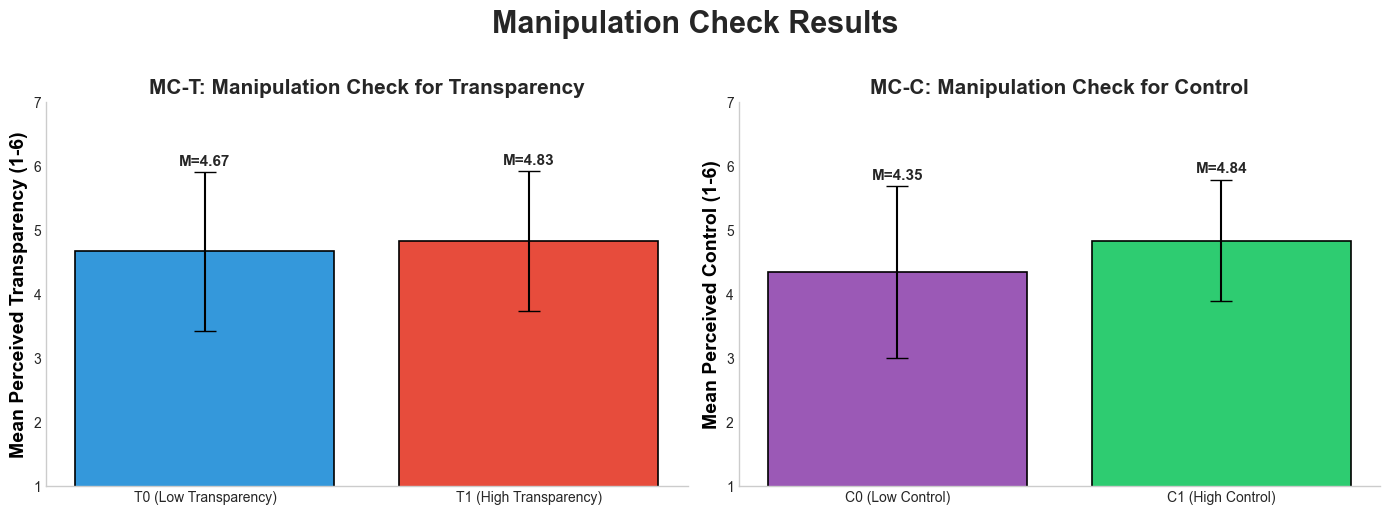


MANIPULATION CHECK VALIDATION
MC-T: T1 (4.83) should be > T0 (4.67)
MC-C: C1 (4.84) should be > C0 (4.35)


In [17]:
# Visualize manipulation checks
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Clean style for both subplots
for a in axes:
    a.grid(False)
    a.set_facecolor('white')
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
fig.patch.set_facecolor('white')

# MC-T by Transparency Level
mc_t_data = manipulation_checks['mc_t_by_t_level']
bars = axes[0].bar(['T0 (Low Transparency)', 'T1 (High Transparency)'], 
                   mc_t_data['Mean'].values,
                   yerr=mc_t_data['SD'].values,
                   color=['#3498db', '#e74c3c'],
                   edgecolor='black', linewidth=1.2,
                   capsize=8)
axes[0].set_ylabel('Mean Perceived Transparency (1-6)', fontsize=14, color='black', fontweight='bold')
axes[0].set_title('MC-T: Manipulation Check for Transparency', fontsize=15, fontweight='bold')
axes[0].set_ylim(1, 7)
for bar, mean, sd in zip(bars, mc_t_data['Mean'].values, mc_t_data['SD'].values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + sd + 0.1, 
                 f'M={mean:.2f}', ha='center', fontsize=11, fontweight='bold')

# MC-C by Control Level
mc_c_data = manipulation_checks['mc_c_by_c_level']
bars = axes[1].bar(['C0 (Low Control)', 'C1 (High Control)'], 
                   mc_c_data['Mean'].values,
                   yerr=mc_c_data['SD'].values,
                   color=['#9b59b6', '#2ecc71'],
                   edgecolor='black', linewidth=1.2,
                   capsize=8)
axes[1].set_ylabel('Mean Perceived Control (1-6)', fontsize=14, color='black', fontweight='bold')
axes[1].set_title('MC-C: Manipulation Check for Control', fontsize=15, fontweight='bold')
axes[1].set_ylim(1, 7)
for bar, mean, sd in zip(bars, mc_c_data['Mean'].values, mc_c_data['SD'].values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + sd + 0.1, 
                 f'M={mean:.2f}', ha='center', fontsize=11, fontweight='bold')

plt.suptitle('Manipulation Check Results', fontsize=22, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('output/phase1/fig_manipulation_checks.png', dpi=150, bbox_inches='tight')
plt.show()

# Validation note
print("\n" + "="*60)
print("MANIPULATION CHECK VALIDATION")
print("="*60)
print(f"MC-T: T1 ({mc_t_data.loc['T1 (High)', 'Mean']:.2f}) should be > T0 ({mc_t_data.loc['T0 (Low)', 'Mean']:.2f})")
print(f"MC-C: C1 ({mc_c_data.loc['C1 (High)', 'Mean']:.2f}) should be > C0 ({mc_c_data.loc['C0 (Low)', 'Mean']:.2f})")

---
## 1.6 Risk + Trust Descriptives

In [18]:
# Compute Risk + Trust
risk_trust = compute_risk_trust(df_filtered)
risk_trust


PHASE 1.6: RISK + TRUST DESCRIPTIVES
         OUT-RISK Mean  OUT-RISK SD  OUT-TRUST Mean  OUT-TRUST SD
A                 2.73         1.44            4.40          1.37
B                 3.08         1.42            4.38          1.33
C                 3.41         1.48            4.22          1.36
D                 3.26         1.47            4.54          1.25
Overall           3.12         1.46            4.40          1.32


,OUT-RISK Mean,OUT-RISK SD,OUT-TRUST Mean,OUT-TRUST SD
A,2.73,1.44,4.40,1.37
B,3.08,1.42,4.38,1.33
C,3.41,1.48,4.22,1.36
D,3.26,1.47,4.54,1.25
Overall,3.12,1.46,4.40,1.32


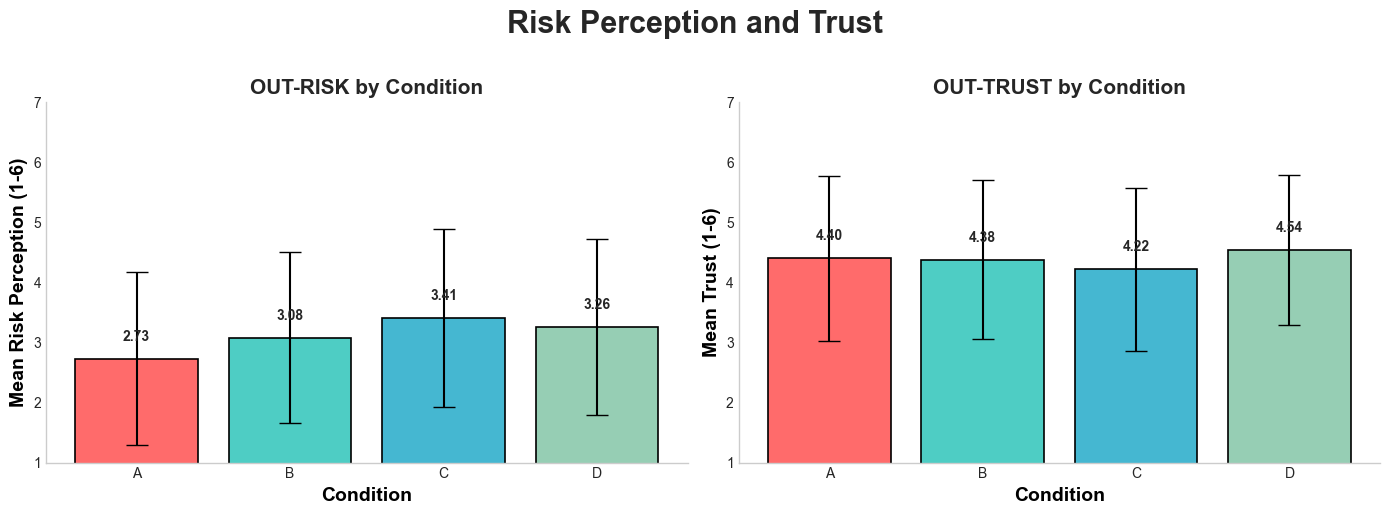

In [19]:
# Visualize Risk and Trust by condition
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Clean style for both subplots
for a in axes:
    a.grid(False)
    a.set_facecolor('white')
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
fig.patch.set_facecolor('white')

conditions = ['A', 'B', 'C', 'D']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

# OUT-RISK
risk_means = risk_trust.loc[conditions, 'OUT-RISK Mean'].values
risk_sds = risk_trust.loc[conditions, 'OUT-RISK SD'].values
bars = axes[0].bar(conditions, risk_means, yerr=risk_sds, color=colors,
                   edgecolor='black', linewidth=1.2, capsize=8)
axes[0].set_ylabel('Mean Risk Perception (1-6)', fontsize=14, color='black', fontweight='bold')
axes[0].set_xlabel('Condition', fontsize=14, color='black', fontweight='bold')
axes[0].set_title('OUT-RISK by Condition', fontsize=15, fontweight='bold')
axes[0].set_ylim(1, 7)
for bar, mean in zip(bars, risk_means):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
                 f'{mean:.2f}', ha='center', fontsize=10, fontweight='bold')

# OUT-TRUST
trust_means = risk_trust.loc[conditions, 'OUT-TRUST Mean'].values
trust_sds = risk_trust.loc[conditions, 'OUT-TRUST SD'].values
bars = axes[1].bar(conditions, trust_means, yerr=trust_sds, color=colors,
                   edgecolor='black', linewidth=1.2, capsize=8)
axes[1].set_ylabel('Mean Trust (1-6)', fontsize=14, color='black', fontweight='bold')
axes[1].set_xlabel('Condition', fontsize=14, color='black', fontweight='bold')
axes[1].set_title('OUT-TRUST by Condition', fontsize=15, fontweight='bold')
axes[1].set_ylim(1, 7)
for bar, mean in zip(bars, trust_means):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
                 f'{mean:.2f}', ha='center', fontsize=10, fontweight='bold')

plt.suptitle('Risk Perception and Trust', fontsize=22, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('output/phase1/fig_risk_trust.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 1.7 Dashboard Option Frequencies (Conditions C & D only)

In [20]:
# Compute dashboard frequencies
dashboard_freq = compute_dashboard_frequencies(df_filtered)


PHASE 1.7: DASHBOARD OPTION FREQUENCIES (CONDITIONS C & D)
Note: Dashboard analysis includes only donors (C: n=42, D: n=53)

DASHBOARD SCOPE:

  Condition C (n=42):
        Option  n    %
          full 31 73.8
   topics-only  7 16.7
questions-only  4  9.5

  Condition D (n=53):
        Option  n    %
          full 42 79.2
questions-only  6 11.3
   topics-only  5  9.4

DASHBOARD PURPOSE:

  Condition C (n=42):
    Option  n    %
  academic 31 73.8
commercial 11 26.2

  Condition D (n=53):
    Option  n    %
  academic 32 60.4
commercial 21 39.6

DASHBOARD STORAGE:

  Condition C (n=42):
       Option  n    %
        swiss 21 50.0
no-preference 13 31.0
  swiss-or-eu  8 19.0

  Condition D (n=53):
       Option  n    %
        swiss 22 41.5
no-preference 18 34.0
  swiss-or-eu 13 24.5

DASHBOARD RETENTION:

  Condition C (n=42):
         Option  n    %
until-fulfilled 24 57.1
          1year  8 19.0
     indefinite  5 11.9
        6months  5 11.9

  Condition D (n=53):
         Option  

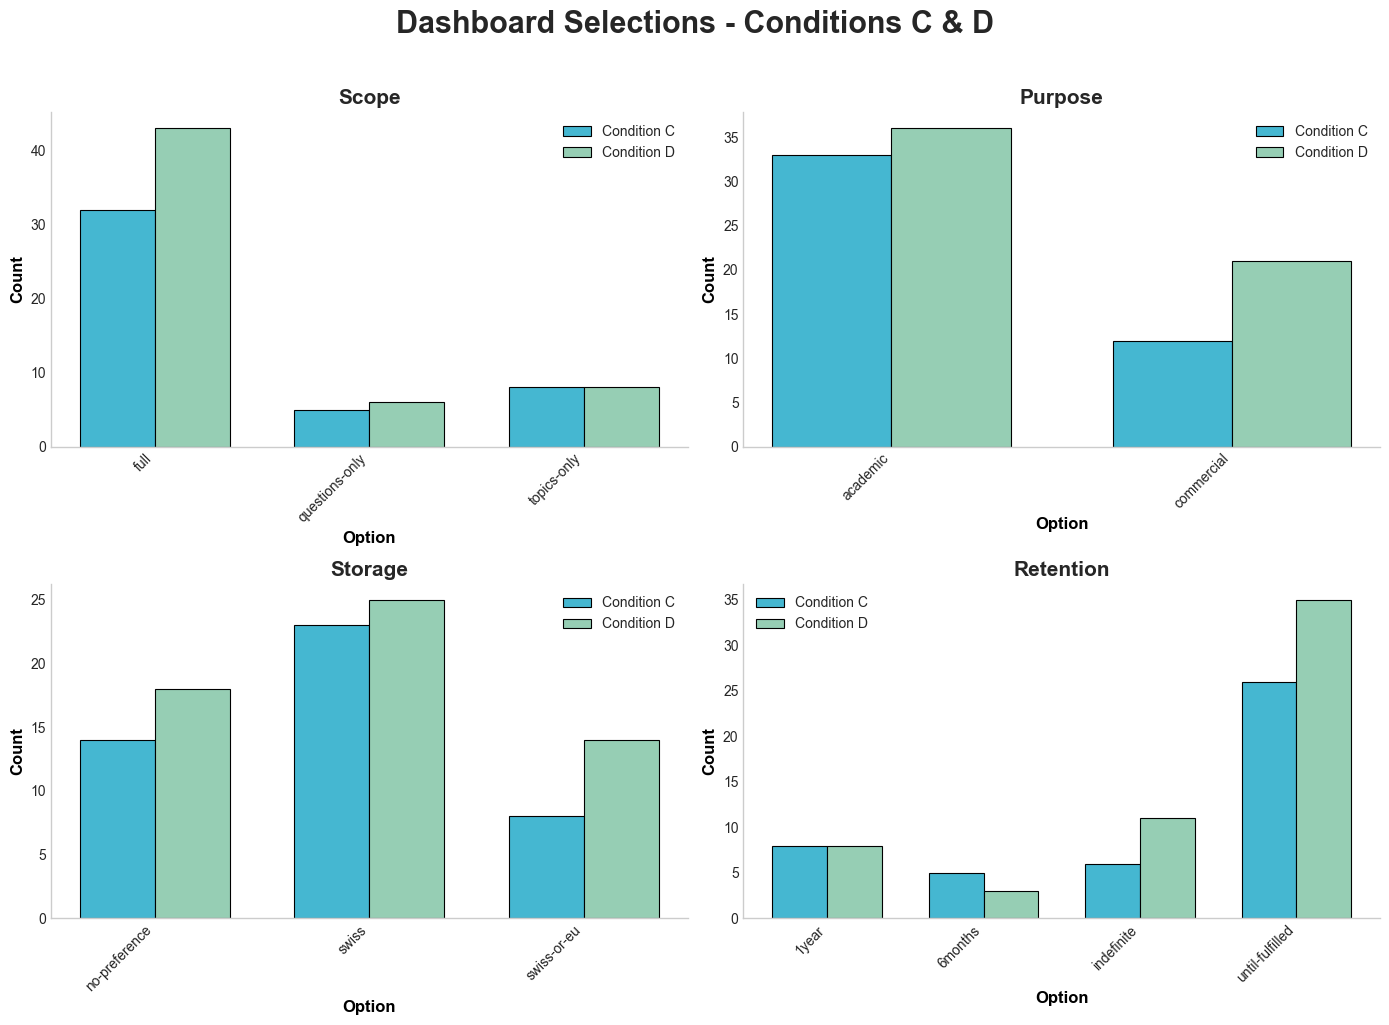

In [21]:
# Visualize dashboard selections (if data exists)
df_cd = df_filtered[df_filtered['condition'].isin(['C', 'D'])]

if len(df_cd) > 0:
    dashboard_vars = ['dashboard_scope', 'dashboard_purpose', 'dashboard_storage', 'dashboard_retention']
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.patch.set_facecolor('white')
    axes = axes.flatten()
    
    for idx, var in enumerate(dashboard_vars):
        ax = axes[idx]
        ax.grid(False)
        ax.set_facecolor('white')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        c_counts = df_cd[df_cd['condition'] == 'C'][var].value_counts()
        d_counts = df_cd[df_cd['condition'] == 'D'][var].value_counts()
        
        all_options = sorted(set(c_counts.index) | set(d_counts.index))
        
        x = np.arange(len(all_options))
        width = 0.35
        
        c_vals = [c_counts.get(opt, 0) for opt in all_options]
        d_vals = [d_counts.get(opt, 0) for opt in all_options]
        
        ax.bar(x - width/2, c_vals, width, label='Condition C', color='#45B7D1', edgecolor='black', linewidth=0.8)
        ax.bar(x + width/2, d_vals, width, label='Condition D', color='#96CEB4', edgecolor='black', linewidth=0.8)
        
        ax.set_xlabel('Option', fontsize=12, color='black', fontweight='bold')
        ax.set_ylabel('Count', fontsize=12, color='black', fontweight='bold')
        ax.set_title(var.replace('dashboard_', '').title(), fontsize=15, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels([str(o)[:15] for o in all_options], rotation=45, ha='right')
        ax.legend()
    
    plt.suptitle('Dashboard Selections - Conditions C & D', 
                 fontsize=22, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('output/phase1/fig_dashboard_frequencies.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("No participants in conditions C or D with dashboard data.")

---
## 1.8 Q14 Free-Text Response Rate

In [22]:
# Compute Q14 response rate
q14_response = compute_q14_response_rate(df_filtered)
q14_response


PHASE 1.8: Q14 FREE-TEXT RESPONSE RATE
Condition   n  Responses  Response Rate (%)  Median Char Length
        A  50         29               58.0                  59
        B  53         34               64.2                  67
        C  45         27               60.0                  75
        D  57         30               52.6                  49
  Overall 205        120               58.5                  60


,Condition,n,Responses,Response Rate (%),Median Char Length
0,A,50,29,58.0,59
1,B,53,34,64.2,67
2,C,45,27,60.0,75
3,D,57,30,52.6,49
4,Overall,205,120,58.5,60


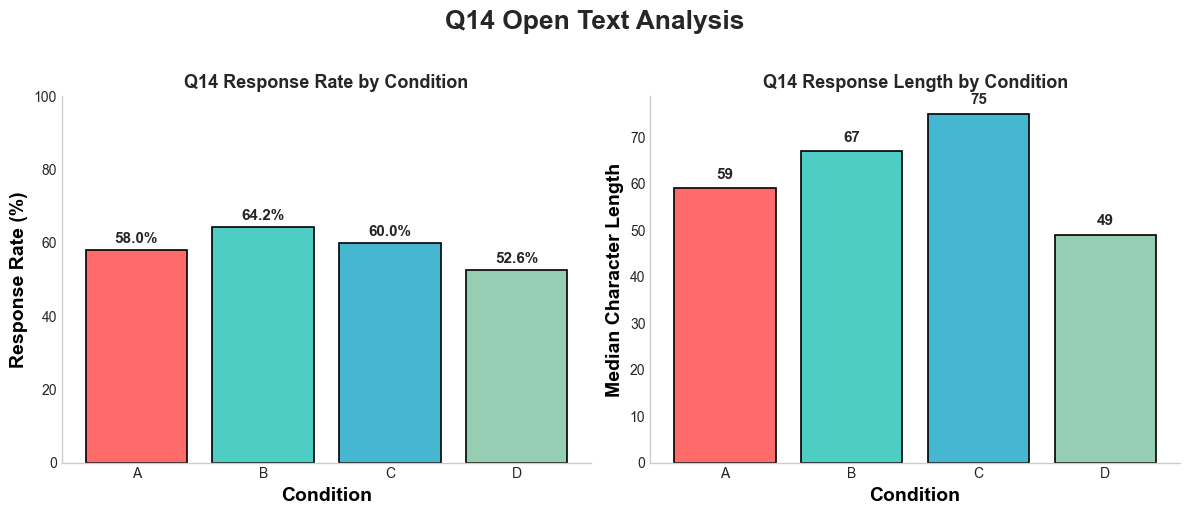

In [23]:
# Visualize Q14 response rate
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Clean style for both subplots
for a in axes:
    a.grid(False)
    a.set_facecolor('white')
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
fig.patch.set_facecolor('white')

# Response rate by condition
q14_cond = q14_response[q14_response['Condition'] != 'Overall']
bars = axes[0].bar(q14_cond['Condition'], q14_cond['Response Rate (%)'], 
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'],
                   edgecolor='black', linewidth=1.2)
axes[0].set_ylabel('Response Rate (%)', fontsize=14, color='black', fontweight='bold')
axes[0].set_xlabel('Condition', fontsize=14, color='black', fontweight='bold')
axes[0].set_title('Q14 Response Rate by Condition', fontsize=13, fontweight='bold')
axes[0].set_ylim(0, 100)
for bar, rate in zip(bars, q14_cond['Response Rate (%)'].values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                 f'{rate:.1f}%', ha='center', fontsize=11, fontweight='bold')

# Median character length
bars = axes[1].bar(q14_cond['Condition'], q14_cond['Median Char Length'], 
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'],
                   edgecolor='black', linewidth=1.2)
axes[1].set_ylabel('Median Character Length', fontsize=14, color='black', fontweight='bold')
axes[1].set_xlabel('Condition', fontsize=14, color='black', fontweight='bold')
axes[1].set_title('Q14 Response Length by Condition', fontsize=13, fontweight='bold')
for bar, length in zip(bars, q14_cond['Median Char Length'].values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                 f'{length}', ha='center', fontsize=11, fontweight='bold')

plt.suptitle('Q14 Open Text Analysis', fontsize=19, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('output/phase1/fig_q14_response.png', dpi=150, bbox_inches='tight')
plt.show()

---
## Summary: Phase 1 Key Results

In [24]:
# Print summary of key results
print("="*70)
print(f"PHASE 1 SUMMARY - {participant_label.upper()}")
print("="*70)

print(f"\n1. SAMPLE SIZE")
print(f"   Initial N: {sample_flow['initial_n']}")
print(f"   Excluded (incomplete survey): {sample_flow['excluded_incomplete_survey']}")
print(f"   Excluded (failed attention check): {sample_flow['excluded_failed_attention']}")
print(f"   Final N: {len(df_filtered)}")
print(f"   Per condition: A={len(df_filtered[df_filtered['condition']=='A'])}, "
      f"B={len(df_filtered[df_filtered['condition']=='B'])}, "
      f"C={len(df_filtered[df_filtered['condition']=='C'])}, "
      f"D={len(df_filtered[df_filtered['condition']=='D'])}")

print(f"\n2. DONATION RATES")
for _, row in donation_rates.iterrows():
    print(f"   {row['Condition']}: {row['Rate (%)']:.1f}% {row['95% CI']}")

print(f"\n3. MANIPULATION CHECKS")
print(f"   MC-T (Transparency): T0={mc_t_data.loc['T0 (Low)', 'Mean']:.2f}, T1={mc_t_data.loc['T1 (High)', 'Mean']:.2f}")
print(f"   MC-C (Control): C0={mc_c_data.loc['C0 (Low)', 'Mean']:.2f}, C1={mc_c_data.loc['C1 (High)', 'Mean']:.2f}")

print(f"\n4. MANIPULATION CHECK VALIDATION")
mc_t_valid = mc_t_data.loc['T1 (High)', 'Mean'] > mc_t_data.loc['T0 (Low)', 'Mean']
mc_c_valid = mc_c_data.loc['C1 (High)', 'Mean'] > mc_c_data.loc['C0 (Low)', 'Mean']
print(f"   MC-T (T1 > T0): {'PASS' if mc_t_valid else 'FAIL'}")
print(f"   MC-C (C1 > C0): {'PASS' if mc_c_valid else 'FAIL'}")

# Calculate key metrics
overall_rate = donation_rates[donation_rates['Condition'] == 'Overall']['Rate (%)'].values[0]
highest_cond = donation_rates[donation_rates['Condition'] != 'Overall'].loc[
    donation_rates['Rate (%)'].idxmax()]
lowest_cond = donation_rates[donation_rates['Condition'] != 'Overall'].loc[
    donation_rates['Rate (%)'].idxmin()]
t0_rate = df_filtered[df_filtered['transparency_level'] == 0]['donation_decision'].mean() * 100
t1_rate = df_filtered[df_filtered['transparency_level'] == 1]['donation_decision'].mean() * 100
c0_rate = df_filtered[df_filtered['control_level'] == 0]['donation_decision'].mean() * 100
c1_rate = df_filtered[df_filtered['control_level'] == 1]['donation_decision'].mean() * 100

print("\n" + "="*70)
print("KEY FINDINGS")
print("="*70)

print(f"""
SAMPLE & DATA QUALITY:
- N = {sample_flow['initial_n']} initial participants, {sample_flow['excluded_incomplete_survey']} excluded (incomplete survey), {sample_flow['excluded_failed_attention']} excluded (failed attention check)
- Final analytic sample: N = {len(df_filtered)} ({len(df_filtered)/sample_flow['initial_n']*100:.1f}% completion rate)
- Approximately balanced conditions (range: {len(df_filtered[df_filtered['condition']=='C'])}–{len(df_filtered[df_filtered['condition']=='D'])} per cell)

DONATION BEHAVIOR:
- Overall donation rate: {overall_rate:.1f}% — CEILING EFFECT
- Highest: Condition {highest_cond['Condition']} ({highest_cond['Rate (%)']:.1f}%)
- Lowest: Condition {lowest_cond['Condition']} ({lowest_cond['Rate (%)']:.1f}%)
- Range across conditions: {highest_cond['Rate (%)'] - lowest_cond['Rate (%)']:.1f} pp
- Transparency effect: T1 ({t1_rate:.1f}%) vs T0 ({t0_rate:.1f}%) = {t1_rate - t0_rate:+.1f} pp
- Control effect: C1 ({c1_rate:.1f}%) vs C0 ({c0_rate:.1f}%) = {c1_rate - c0_rate:+.1f} pp
- All confidence intervals overlap substantially → minimal differentiation

MANIPULATION CHECKS:
- MC-T: T1 (M={mc_t_data.loc['T1 (High)', 'Mean']:.2f}) > T0 (M={mc_t_data.loc['T0 (Low)', 'Mean']:.2f}) — direction correct, small effect
- MC-C: C1 (M={mc_c_data.loc['C1 (High)', 'Mean']:.2f}) > C0 (M={mc_c_data.loc['C0 (Low)', 'Mean']:.2f}) — direction correct, moderate effect

RISK & TRUST:
- Risk perception moderate (M={risk_trust.loc['Overall', 'OUT-RISK Mean']:.2f}, SD={risk_trust.loc['Overall', 'OUT-RISK SD']:.2f})
- Trust relatively high (M={risk_trust.loc['Overall', 'OUT-TRUST Mean']:.2f}, SD={risk_trust.loc['Overall', 'OUT-TRUST SD']:.2f})

IMPLICATIONS:
- The 91.7% ceiling effect severely limits statistical power to detect treatment differences
- Subsequent chi-square and logistic regression analyses may show non-significant results
- The high baseline willingness to donate may reflect sample characteristics (educated, Swiss, civic-minded)
""")

print("="*70)

PHASE 1 SUMMARY - HUMAN PARTICIPANTS

1. SAMPLE SIZE
   Initial N: 291
   Excluded (incomplete survey): 79
   Excluded (failed attention check): 7
   Final N: 205
   Per condition: A=50, B=53, C=45, D=57

2. DONATION RATES
   A: 90.0% [78.6, 95.7]
   B: 90.6% [79.7, 95.9]
   C: 93.3% [82.1, 97.7]
   D: 93.0% [83.3, 97.2]
   Overall: 91.7% [87.1, 94.8]

3. MANIPULATION CHECKS
   MC-T (Transparency): T0=4.67, T1=4.83
   MC-C (Control): C0=4.35, C1=4.84

4. MANIPULATION CHECK VALIDATION
   MC-T (T1 > T0): PASS
   MC-C (C1 > C0): PASS

KEY FINDINGS

SAMPLE & DATA QUALITY:
- N = 291 initial participants, 79 excluded (incomplete survey), 7 excluded (failed attention check)
- Final analytic sample: N = 205 (70.4% completion rate)
- Approximately balanced conditions (range: 45–57 per cell)

DONATION BEHAVIOR:
- Overall donation rate: 91.7% — CEILING EFFECT
- Highest: Condition C (93.3%)
- Lowest: Condition A (90.0%)
- Range across conditions: 3.3 pp
- Transparency effect: T1 (91.8%) vs T0 (91.

In [25]:
# List all saved files
print("\nSaved output files:")
import glob
for f in sorted(glob.glob('output/phase1/*')):
    print(f"  - {f}")


Saved output files:
  - output/phase1/fig_dashboard_frequencies.png
  - output/phase1/fig_demographics.png
  - output/phase1/fig_donation_rates.png
  - output/phase1/fig_donation_rates_by_factor.png
  - output/phase1/fig_manipulation_checks.png
  - output/phase1/fig_n_per_condition.png
  - output/phase1/fig_q14_response.png
  - output/phase1/fig_risk_trust.png
  - output/phase1/fig_sample_flow.png
  - output/phase1/phase1_age_overall_ai.csv
  - output/phase1/phase1_age_overall_human.csv
  - output/phase1/phase1_dashboard_purpose_C_ai.csv
  - output/phase1/phase1_dashboard_purpose_C_human.csv
  - output/phase1/phase1_dashboard_purpose_D_ai.csv
  - output/phase1/phase1_dashboard_purpose_D_human.csv
  - output/phase1/phase1_dashboard_retention_C_ai.csv
  - output/phase1/phase1_dashboard_retention_C_human.csv
  - output/phase1/phase1_dashboard_retention_D_ai.csv
  - output/phase1/phase1_dashboard_retention_D_human.csv
  - output/phase1/phase1_dashboard_scope_C_ai.csv
  - output/phase1/pha